In [57]:
import _path
import json
import pandas as pd
from txgnn import TxData, TxGNN, TxEval

In [58]:


Tx_data = TxData(data_folder_path = '../../../.images/neo4j/data_primekg')
Tx_data.prepare_split(split = 'complex_disease', seed = 42, no_kg = False)

Tx_GNN = TxGNN(data = Tx_data, 
          weight_bias_track = False,
          proj_name = 'TxGNN',
          exp_name = 'TxGNN',
          #device='cpu'
          )

Found local copy...
Found local copy...
Found local copy...
Found saved processed KG... Loading...


KeyboardInterrupt: 

# Drug tsne

In [ ]:

model_path = '../data/TxGNNExplorer'
Tx_GNN.load_pretrained(model_path)

In [ ]:
Tx_GNN.retrieve_embedding('./')

{'anatomy': tensor([[ 0.6564,  0.3251, -0.0432,  ..., -0.4020,  0.4498, -0.8030],
         [-0.0260,  0.0193,  0.0054,  ..., -0.0306,  0.0166, -0.0207],
         [-0.0736,  0.0389,  0.0762,  ..., -0.0347, -0.0448, -0.1355],
         ...,
         [-0.0258,  0.0835,  0.0583,  ..., -0.0652, -0.0686, -0.0950],
         [-0.0258,  0.0835,  0.0583,  ..., -0.0652, -0.0686, -0.0950],
         [-0.0258,  0.0835,  0.0583,  ..., -0.0652, -0.0686, -0.0950]]),
 'biological_process': tensor([[-0.0502, -0.1089, -0.0254,  ...,  0.1488, -0.0345,  0.1051],
         [-0.6473,  1.9137, -0.8830,  ...,  0.0911,  0.4088, -0.5739],
         [-0.3599,  0.7288,  0.1390,  ...,  0.6110, -0.5460, -0.3918],
         ...,
         [-0.0510,  0.0117,  0.1013,  ..., -0.2621, -0.1796,  0.2558],
         [-0.0497,  0.0656, -0.0105,  ...,  0.0626, -0.0805,  0.3610],
         [-0.0130, -0.1642, -0.0578,  ..., -0.0509, -0.1650,  0.0717]]),
 'cellular_component': tensor([[-0.4257,  0.5248, -0.1757,  ..., -0.4078,  0.4781, 

In [ ]:
import pickle 
with open("./node_emb.pkl", "rb") as f:
    data = pickle.load(f)

In [ ]:
drug = data['drug']

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
drug_tsne_results = tsne.fit_transform(drug)

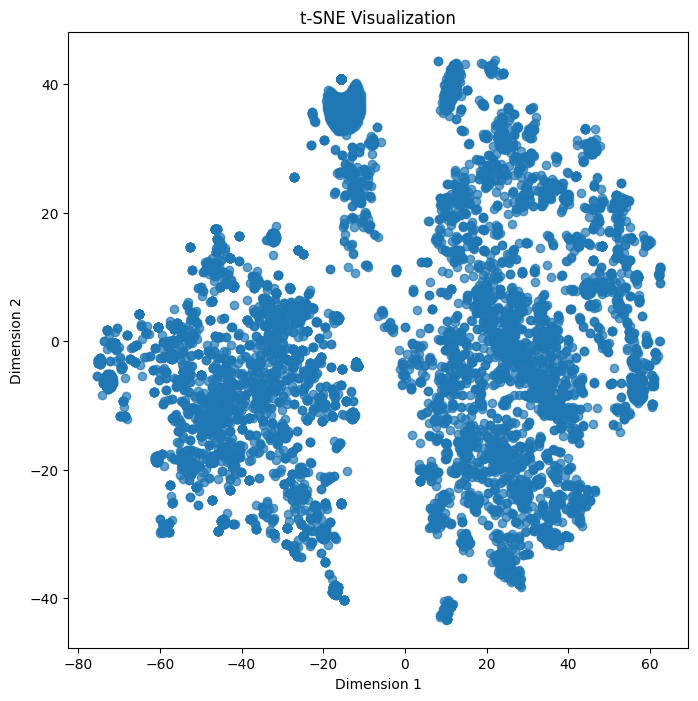

In [ ]:
import matplotlib.pyplot as plt

# Optional: If you have labels, load them too
labels = None  # Replace with your label loading logic if needed

# Scatter plot
plt.figure(figsize=(8, 8))
if labels is not None:
    scatter = plt.scatter(drug_tsne_results[:, 0], drug_tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
else:
    plt.scatter(drug_tsne_results[:, 0], drug_tsne_results[:, 1], alpha=0.7)
    
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
df_kg = pd.read_csv('../../../.images/neo4j/data_primekg/kg_directed.csv')

In [ ]:

df_kg[df_kg['relation']=='indication'].sort_values('x_id').head()


,x_type,x_id,relation,y_type,y_id,x_idx,y_idx
387115,drug,DB00002,indication,disease,21063.0,1.0,7838.0
387116,drug,DB00002,indication,disease,5575.0,1.0,13149.0
389121,drug,DB00002,indication,disease,5595.0,1.0,13166.0
389120,drug,DB00002,indication,disease,536.0,1.0,12945.0
389119,drug,DB00002,indication,disease,10150_4958_5096_6082_500_514,1.0,301.0


In [ ]:
with open('/home/apakiman/Repo/merck_gds_explr/submodules/Drug_Explorer/drug_server/txgnn_data/node_name_dict.json', 'r') as file:
    node_name_dic = json.load(file)

In [ ]:
drug_xid = df_kg[df_kg['x_type']=='drug'].drop_duplicates(subset='x_id', keep='first')['x_id'].tolist()
#drug_xid_sort = sorted(drug_xid)
drug_tsne = drug_tsne_results.tolist()

output_tsne = dict(zip(drug_xid, drug_tsne))

In [ ]:
#with open('./txgnn_data_sample/drug_tsne.json', 'w') as f:
with open('/home/apakiman/Repo/merck_gds_explr/submodules/Drug_Explorer/drug_server/txgnn_data/drug_tsne.json', 'w') as f:
    json.dump(output_tsne, f, indent=4)

In [ ]:
file_path = '/home/apakiman/Repo/merck_gds_explr/submodules/TxGNN/data/TxGNNExplorer/node_emb_embed_tsne.pkl'
file_path = '/home/apakiman/Repo/merck_gds_explr/submodules/TxGNN/data/TxGNNExplorer/node_emb.pkl'
with open(file_path, 'rb') as file:
    pickle_check = pickle.load(file)


pickle_check

{'anatomy': tensor([[ 0.6920,  0.3442, -0.0517,  ..., -0.4321,  0.3799, -0.7834],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0603,  0.0327,  0.0637,  ..., -0.0344, -0.0349, -0.1274],
         ...,
         [-0.0258,  0.0835,  0.0583,  ..., -0.0652, -0.0686, -0.0950],
         [-0.0258,  0.0835,  0.0583,  ..., -0.0652, -0.0686, -0.0950],
         [-0.0258,  0.0835,  0.0583,  ..., -0.0652, -0.0686, -0.0950]]),
 'biological_process': tensor([[-0.0419, -0.1052, -0.0023,  ...,  0.1088, -0.0641,  0.1101],
         [-0.1750, -0.2556, -0.0603,  ...,  0.0382,  0.1053, -0.2174],
         [-0.4958,  0.4321,  0.1547,  ...,  0.6202, -0.5734, -0.5377],
         ...,
         [-0.0638,  0.0289,  0.0762,  ..., -0.1521, -0.1183,  0.2397],
         [-0.0652,  0.0825, -0.0084,  ...,  0.0235, -0.0761,  0.3504],
         [-0.0561, -0.1164, -0.0532,  ..., -0.1473, -0.1446,  0.0849]]),
 'cellular_component': tensor([[-0.4257,  0.5248, -0.1757,  ..., -0.4078,  0.4781, 

# drug_indication_subset.pkl

In [ ]:
a = df_kg[df_kg['relation']=='indication'].drop_duplicates(subset='x_id', keep='first').sort_values('x_id')['x_id'].to_list()

drug_with_indications = list(df_kg[df_kg['relation']=='indication']['x_id'].unique())


## node_types.json

In [ ]:
sorted(list(df_kg['x_type'].unique()))

['anatomy',
 'biological_process',
 'cellular_component',
 'disease',
 'drug',
 'effect/phenotype',
 'exposure',
 'gene/protein',
 'molecular_function',
 'pathway']

In [ ]:
node_types = Tx_GNN.G.ntypes

with open('./txgnn_data_sample/node_types.json', 'w') as file:
    json.dump(node_types, file,  indent=4)

## edge_types.json

In [ ]:
df_edges = pd.read_csv('../../../.images/neo4j/data_primekg/edges.csv')
df_edges.head()

,relation,display_relation,x_index,y_index
0,protein_protein,ppi,0,8889
1,protein_protein,ppi,1,2798
2,protein_protein,ppi,2,5646
3,protein_protein,ppi,3,11592
4,protein_protein,ppi,4,2122


In [ ]:
edge_info = df_edges.drop_duplicates(keep='first', subset='relation')

edge_info.head()


,relation,display_relation,x_index,y_index
0,protein_protein,ppi,0,8889
321075,drug_protein,carrier,14012,7183
346728,contraindication,contraindication,15193,33577
346730,indication,indication,16687,33577
347016,off-label use,off-label use,14257,33577


In [ ]:

edges_only = df_kg.drop_duplicates(keep='first', subset='relation').sort_values(by='relation')

output = {}
for _, row in edges_only.iterrows():
    key = row["relation"]
    if key not in output:
        edge_info_value = edge_info[
             edge_info['relation'] == key]["display_relation"].to_list()[0]
        
        output[key] = {
            "nodes": [row["x_type"], row["y_type"]],
            "edgeInfo": edge_info_value,
        }
        

with open('./txgnn_data_sample/edge_types.json', 'w') as file:
    json.dump(output, file,  indent=4)

In [ ]:
df_gm = pd.read_csv('/home/apakiman/Repo/merck_gds_explr/submodules/Drug_Explorer/drug_server/txgnn_data/graphmask_output_indication.csv')

df_gm.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/apakiman/Repo/merck_gds_explr/submodules/Drug_Explorer/drug_server/txgnn_data/graphmask_output_indication.csv'

# node_name_dict.json

In [ ]:
with open('/home/apakiman/Repo/merck_gds_explr/submodules/Drug_Explorer/drug_server/txgnn_data/node_name_dict.json', 'r') as file:
    data = json.load(file)

for k,_ in data.items():
    print(k)

anatomy
biological_process
cellular_component
disease
drug
effect/phenotype
exposure
gene/protein
molecular_function
pathway


In [ ]:

# Function to print the differences in a beautified way
def print_diff_beautifully(differences):
    # If there are no differences
    if not differences:
        print("The files are identical!")
        return
    
    # Handle different types of changes
    if 'values_changed' in differences:
        print("Values Changed:")
        for path, change in differences['values_changed'].items():
            print(f"- {path} changed from {change['old_value']} to {change['new_value']}")
    
    if 'dictionary_item_added' in differences:
        print("\nItems Added:")
        for path, value in differences['dictionary_item_added'].items():
            print(f"- {path} was added with value: {json.dumps(value, indent=2)}")
    
    if 'dictionary_item_removed' in differences:
        print("\nItems Removed:")
        for path, value in differences['dictionary_item_removed'].items():
            print(f"- {path} was removed (value was: {json.dumps(value, indent=2)})")
    
    if 'type_changes' in differences:
        print("\nType Changes:")
        for path, change in differences['type_changes'].items():
            print(f"- {path} type changed from {change['old_type']} to {change['new_type']}")
    
    if 'iterable_item_added' in differences:
        print("\nIterable Items Added:")
        for path, items in differences['iterable_item_added'].items():
            print(f"- Items added at {path}: {json.dumps(items, indent=2)}")
    
    if 'iterable_item_removed' in differences:
        print("\nIterable Items Removed:")
        for path, items in differences['iterable_item_removed'].items():
            print(f"- Items removed at {path}: {json.dumps(items, indent=2)}")


In [ ]:

# Function to convert differences to a DataFrame
def diff_to_dataframe(differences, file1, file2):
    # Prepare a list to hold the rows for the DataFrame
    rows = []

    # Handle different types of changes
    if 'values_changed' in differences:
        for path, change in differences['values_changed'].items():
            rows.append([
                "Value Changed", 
                path, 
                json.dumps(change['old_value'], indent=2), 
                json.dumps(change['new_value'], indent=2)
            ])
    
    if 'dictionary_item_added' in differences:
        for path in differences['dictionary_item_added']:
            rows.append([
                "Item Added", 
                path, 
                "N/A", 
                "Added in File 2"
            ])
    
    if 'dictionary_item_removed' in differences:
        for path in differences['dictionary_item_removed']:
            rows.append([
                "Item Removed", 
                path, 
                "Removed from File 1", 
                "N/A"
            ])
    
    if 'type_changes' in differences:
        for path, change in differences['type_changes'].items():
            rows.append([
                "Type Changed", 
                path, 
                change['old_type'], 
                change['new_type']
            ])
    
    if 'iterable_item_added' in differences:
        for path, items in differences['iterable_item_added'].items():
            if isinstance(items, list):
                rows.append([
                    "Iterable Item Added", 
                    path, 
                    "N/A", 
                    json.dumps(items, indent=2)
                ])
    
    if 'iterable_item_removed' in differences:
        for path, items in differences['iterable_item_removed'].items():
            if isinstance(items, list):
                rows.append([
                    "Iterable Item Removed", 
                    path, 
                    json.dumps(items, indent=2), 
                    "N/A"
                ])
    
    # Create a DataFrame
    df = pd.DataFrame(rows, columns=["Change Type", "Path", f"{file1} Value", f"{file2} Value"])

    return df

In [ ]:
import json
from deepdiff import DeepDiff

# Load the JSON files
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Compare the JSON files
def compare_json(file1, file2):
    # Load the two JSON files
    json1 = load_json(file1)
    json2 = load_json(file2)
    
    # Use DeepDiff to compare the two JSON objects
    diff = DeepDiff(json1, json2, ignore_order=True)  # Ignore order if the order of keys in dictionaries doesn't matter
    return diff

# Paths to your JSON files
dir_path = '../../Drug_Explorer/drug_server/txgnn_data/'
file1_path = f'{dir_path}node_name_dict_python.json'
file2_path = f'{dir_path}node_name_dict.json'

# Compare and print the differences
differences = compare_json(file1_path, file2_path)



In [ ]:
diff = diff_to_dataframe(differences, ' python', 'orig')

In [ ]:
diff.to_csv('differences_output.csv', index=False)
diff['Change Type'].unique()

array(['Value Changed', 'Item Added', 'Item Removed'], dtype=object)

In [ ]:
diff[diff['Change Type'] == 'Item Removed']

,Change Type,Path,python Value,orig Value
1292,Item Removed,root['anatomy']['35.0'],Removed from File 1,N/A
1293,Item Removed,root['anatomy']['87.0'],Removed from File 1,N/A
1294,Item Removed,root['anatomy']['100.0'],Removed from File 1,N/A
1295,Item Removed,root['anatomy']['153.0'],Removed from File 1,N/A
1296,Item Removed,root['anatomy']['156.0'],Removed from File 1,N/A
...,...,...,...,...
4232,Item Removed,root['molecular_function']['47062.0'],Removed from File 1,N/A
4233,Item Removed,root['molecular_function']['33730.0'],Removed from File 1,N/A
4234,Item Removed,root['molecular_function']['3786.0'],Removed from File 1,N/A
4235,Item Removed,root['pathway']['R-HSA-1222538'],Removed from File 1,N/A


In [ ]:
df_kg0 = pd.read_csv('../../../.images/neo4j/data_primekg/kg.csv')
df_kg0.head()

,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
0,protein_protein,ppi,0,9796,gene/protein,PHYHIP,NCBI,8889,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,1,7918,gene/protein,GPANK1,NCBI,2798,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,2,8233,gene/protein,ZRSR2,NCBI,5646,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,3,4899,gene/protein,NRF1,NCBI,11592,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,4,5297,gene/protein,PI4KA,NCBI,2122,8601,gene/protein,RGS20,NCBI


In [ ]:
output = {}
for n in node_types:
    n_list = {}
    df_filter = df_kg0[df_kg0['x_type'] == n].drop_duplicates(subset='x_id', keep='first')
    if n != 'disease':
        continue
    
    print
    for _, row in df_filter.iterrows():
        if n == 'diesese':
            key = row["x_id"]
        else:
            key = str(float(row["x_id"]))
        except ValueError:

        if key not in n_list:

            n_list[key] = row['x_name']
    output[n] = n_list
    

output


{'disease': {'1.3924125921467213e+104': 'osteogenesis imperfecta',
  'inf': 'autosomal recessive nonsyndromic deafness',
  '80991249712498.0': 'congenital stationary night blindness autosomal dominant',
  '1.4854142931447012e+268': 'autosomal dominant nonsyndromic deafness',
  '3.3202327763090534e+79': 'deafness, autosomal recessive',
  '113967422.0': 'keratoderma hereditarium mutilans',
  '1.4828148299454134e+21': 'immunodeficiency-centromeric instability-facial anomalies syndrome',
  '8019.0': 'mullerian aplasia and hyperandrogenism',
  '11043.0': 'myelodysplasia, immunodeficiency, facial dysmorphism, short stature, and psychomotor delay',
  '9.260926192621814e+16': 'GM1 gangliosidosis',
  '8878.0': 'bone dysplasia, lethal Holmgren type',
  '8905.0': 'predisposition to invasive fungal disease due to CARD9 deficiency',
  '1.4083132881298713e+54': 'agammaglobulinemia',
  '7162.0': 'asymmetric short stature syndrome',
  '9699.0': 'action myoclonus-renal failure syndrome',
  '1.498614987